In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('clean_dt_acc.csv')

In [3]:
df.head(1)

,Unnamed: 0,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day
0,0,2021-06-27,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,55.835218,Daylight,North Larkshire,-3.912012,...,Dry,Single carriageway,60,09:35:00,Rural,Fine no high winds,Car,2021,6,27


In [4]:
df1=df.iloc[:,1:]
df1.head(1)

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day
0,2021-06-27,Saturday,Data missing or out of range,Not at junction or within 20 metres,Fatal,55.835218,Daylight,North Larkshire,-3.912012,1,...,Dry,Single carriageway,60,09:35:00,Rural,Fine no high winds,Car,2021,6,27


In [10]:
for l in obj:
    v=df1[l].value_counts()
    print(v)

Accident Date
2021-12-04    135
2021-10-09    131
2021-05-01    130
2021-10-02    127
2021-11-12    123
             ... 
2022-11-24      1
2022-12-11      1
2022-01-18      1
2022-10-08      1
2022-01-19      1
Name: count, Length: 482, dtype: int64
Day_of_Week
Friday       5004
Wednesday    4542
Thursday     4533
Tuesday      4529
Saturday     4155
Monday       4144
Sunday       3522
Name: count, dtype: int64
Junction_Control
Give way or uncontrolled               15553
Data missing or out of range            8927
Auto traffic signal                     5090
Not at junction or within 20 metres      750
Stop sign                                 86
Authorised person                         23
Name: count, dtype: int64
Junction_Detail
T or staggered junction                12350
Not at junction or within 20 metres     9663
Crossroads                              4567
Roundabout                              1559
Private drive or entrance                785
Other junction                 

<Axes: ylabel='count'>

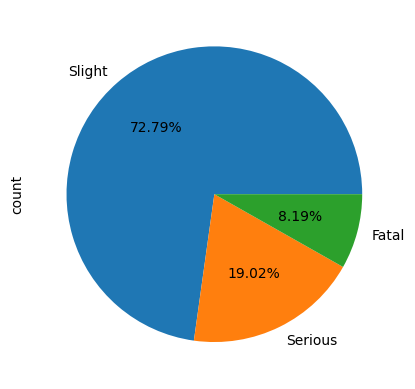

In [12]:
df1['Accident_Severity'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: >

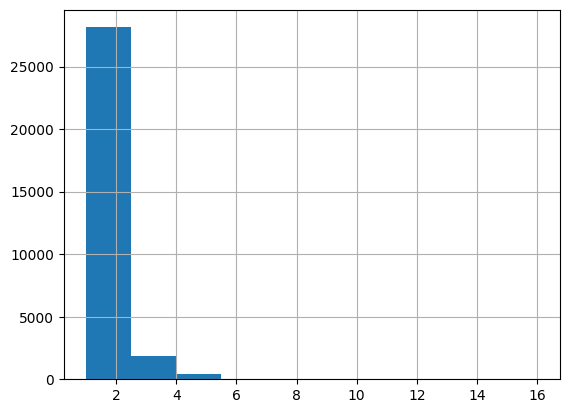

In [14]:
df1['Number_of_Vehicles'].hist()

<Axes: xlabel='Accident_Severity', ylabel='Speed_limit'>

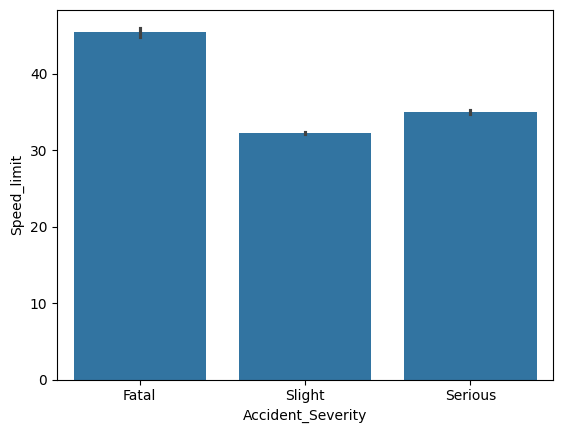

In [16]:
sns.barplot(x='Accident_Severity',y='Speed_limit',data=df)

<Axes: xlabel='Month', ylabel='Number_of_Casualties'>

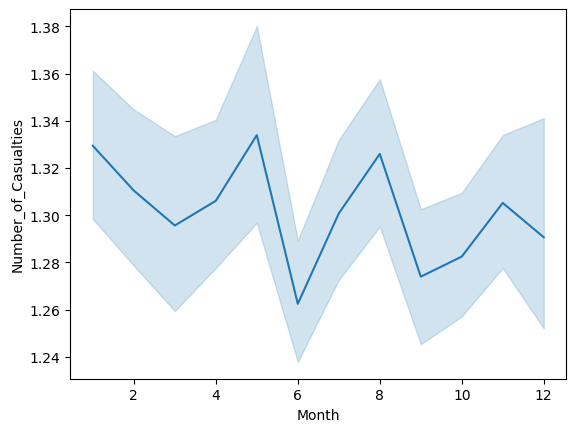

In [21]:
sns.lineplot(x='Month',y='Number_of_Casualties',data=df)

In [70]:
df1['Year'].value_counts()

Year
2021    30292
2022      137
Name: count, dtype: int64

In [26]:
df1.groupby('Year')[['Number_of_Casualties']].sum()

,Number_of_Casualties
Year,
2021,39345
2022,229


<Axes: xlabel='Year'>

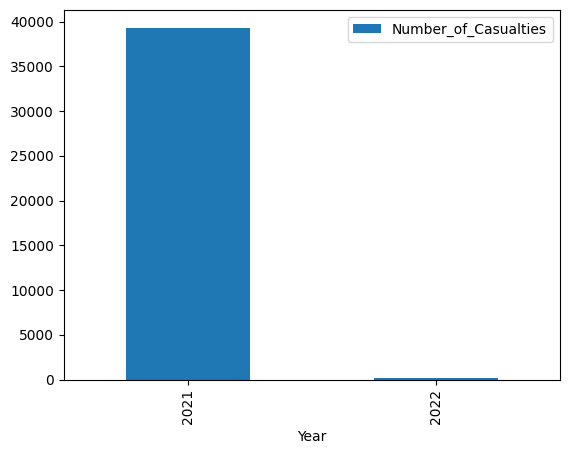

In [25]:
df1.groupby('Year')[['Number_of_Casualties']].sum().plot(kind='bar')

In [69]:
df1['Month'].value_counts()

Month
10    2921
11    2749
6     2721
5     2659
9     2654
7     2627
3     2537
4     2532
8     2402
12    2357
1     2292
2     1978
Name: count, dtype: int64

In [27]:
df1.groupby('Month')[['Number_of_Casualties']].sum()

,Number_of_Casualties
Month,
1,3047
2,2592
3,3287
4,3307
5,3547
6,3435
7,3417
8,3185
9,3381


In [32]:
df1.groupby('Road_Type')[['Number_of_Casualties']].sum()

,Number_of_Casualties
Road_Type,
Dual carriageway,5377
One way street,701
Roundabout,1505
Single carriageway,31742
Slip road,249


In [33]:
df1.groupby('Vehicle_Type')[['Number_of_Casualties']].sum()

,Number_of_Casualties
Vehicle_Type,
Agricultural vehicle,73
Bus or coach (17 or more pass seats),730
Car,32624
Goods 7.5 tonnes mgw and over,895
Goods over 3.5t. and under 7.5t,121
Minibus (8 - 16 passenger seats),102
Motorcycle 125cc and under,863
Motorcycle 50cc and under,555
Motorcycle over 125cc and up to 500cc,168


In [48]:
df1['Vehicle_Type'][df1['Speed_limit']==df1['Speed_limit'].max()].value_counts()

Vehicle_Type
Car                                      571
Van / Goods 3.5 tonnes mgw or under       33
Motorcycle over 500cc                     23
Taxi/Private hire car                     14
Motorcycle 125cc and under                10
Goods 7.5 tonnes mgw and over             10
Bus or coach (17 or more pass seats)      10
Motorcycle 50cc and under                  9
Motorcycle over 125cc and up to 500cc      8
Other vehicle                              3
Goods over 3.5t. and under 7.5t            3
Agricultural vehicle                       1
Minibus (8 - 16 passenger seats)           1
Name: count, dtype: int64

In [53]:
df1['Accident Date'][df1['Number_of_Casualties']==df1['Number_of_Casualties'].max()]

30070    2021-12-22
Name: Accident Date, dtype: object

In [56]:
df1.groupby('Accident_Severity')[['Number_of_Casualties']].max()

,Number_of_Casualties
Accident_Severity,
Fatal,48
Serious,18
Slight,13


<Axes: xlabel='Number_of_Casualties', ylabel='Number_of_Vehicles'>

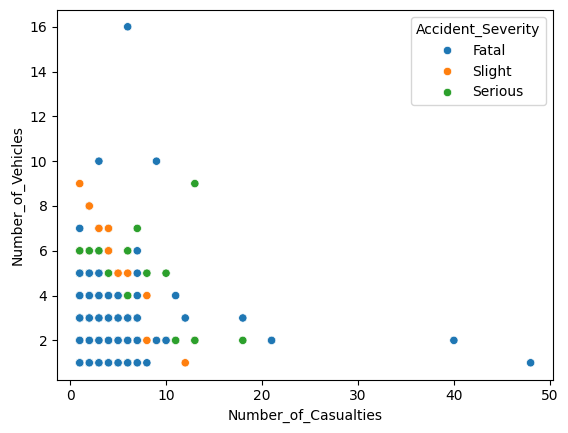

In [58]:
sns.scatterplot(x='Number_of_Casualties',y='Number_of_Vehicles',data=df1,hue='Accident_Severity')

In [62]:
df1.groupby('Day_of_Week')[['Number_of_Casualties']].sum()

,Number_of_Casualties
Day_of_Week,
Friday,6431
Monday,5241
Saturday,5744
Sunday,5009
Thursday,5719
Tuesday,5683
Wednesday,5747


In [66]:
df1['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       25728
Raining no high winds     3245
Other                      545
Fine + high winds          294
Raining + high winds       271
Snowing no high winds      246
Fog or mist                 67
Snowing + high winds        33
Name: count, dtype: int64

In [68]:
df1.groupby('Weather_Conditions')[['Accident_Severity']].value_counts()

Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 179
                       Serious                 72
                       Fatal                   43
Fine no high winds     Slight               18753
                       Serious               4893
                       Fatal                 2082
Fog or mist            Slight                  38
                       Serious                 16
                       Fatal                   13
Other                  Slight                 389
                       Serious                102
                       Fatal                   54
Raining + high winds   Slight                 176
                       Serious                 57
                       Fatal                   38
Raining no high winds  Slight                2397
                       Serious                600
                       Fatal                  248
Snowing + high winds   Slight                  26
         

In [71]:
df1.groupby('Weather_Conditions')[['Light_Conditions']].value_counts()

Weather_Conditions     Light_Conditions           
Fine + high winds      Daylight                         192
                       Darkness - lights lit             81
                       Darkness - no lighting            16
                       Darkness - lighting unknown        3
                       Darkness - lights unlit            2
Fine no high winds     Daylight                       18906
                       Darkness - lights lit           6139
                       Darkness - no lighting           550
                       Darkness - lighting unknown       90
                       Darkness - lights unlit           43
Fog or mist            Darkness - lights lit             26
                       Daylight                          23
                       Darkness - no lighting            17
                       Darkness - lights unlit            1
Other                  Daylight                         315
                       Darkness - lights lit     

In [8]:
obj=df1.select_dtypes('object').columns
obj

Index(['Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [7]:
df1.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year,Month,Day
count,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000
mean,52.118352,-0.781020,1.300536,1.763712,33.827599,2021.004502,6.665746,15.633212
std,1.112080,1.166411,0.846598,0.662452,9.817079,0.066949,3.379483,8.792739
min,50.131438,-6.203171,1.000000,1.000000,20.000000,2021.000000,1.000000,1.000000
25%,51.481486,-1.443361,1.000000,1.000000,30.000000,2021.000000,4.000000,8.000000
50%,51.540360,-0.176367,1.000000,2.000000,30.000000,2021.000000,7.000000,16.000000
75%,52.510880,-0.071488,1.000000,2.000000,30.000000,2021.000000,10.000000,23.000000
max,58.596583,1.736892,48.000000,16.000000,70.000000,2022.000000,12.000000,31.000000
